

# Project: Investigate a Dataset (Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



Soccer database is SQLite file, this database consists of 8 tables with different number of rows and columns.
### Tables of Soccer database are:
- Country table shape ( 11 X 2 )
- League tabel shape ( 11 X 3 )
- Match tabel shape ( 25979  X 115 )
- Player tabel shape ( 11060 X 7 )
- Player_Attributes tabel shape (183978 X 42 )
- Team tabel shape ( 299 X 5 )
- Team_Attributes tabel shape ( 1458  X 25 )
- sqlite_sequence tabel shape ( 7 X 2 )


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

In [3]:
# connect the sqlite file of the database which i will use
db = sqlite3.connect('database.sqlite')

In [4]:
# Construct the Data Frame for each table of the database
country_df = pd.read_sql_query('Select * from Country',db)
league_df = pd.read_sql_query('select * from League',db)
team_df = pd.read_sql_query('select * from Team',db)
team_attributes_df = pd.read_sql_query('select * from Team_Attributes',db)
match_df = pd.read_sql_query('select * from Match',db)
player_df = pd.read_sql_query('select * from Player',db)
player_attributes_df = pd.read_sql_query('select * from Player_Attributes',db)

In [24]:
# Function to find unique values of a given column name
def unique_values(column_name):
    # input : column Name 
    # output: set of unique values of this column
    unique_val = []
    for value in column_name.values:
        unique_val.append(value)
    return set(unique_val)

In [50]:
# Test the function
unique_values(player_attributes_df.attacking_work_rate)

{'None', 'high', 'le', 'low', 'medium', 'norm', 'stoc', 'y'}

In [51]:
player_attributes_df.attacking_work_rate.unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

### Questions
- which players had the highest overall rating?
- What is the preffered foot ratio?
- Which league had the most scored goals?
- How many goals scored per season by all leagues ?
- Who are the oldest, youngest, tallest, shortest players ?
- what is the biggest match result ?
- who are the best defenders (marking players) ?
- What is the relation between variables?

<a id='wrangling'></a>
## Data Wrangling

In [29]:
country_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
league_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [8]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
player_df.duplicated().sum()

0

In [10]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [11]:
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
player_attributes_df.duplicated().sum()

0

In [13]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [14]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [15]:
team_df.duplicated().sum()

0

In [16]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [17]:
team_attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [18]:
team_attributes_df.duplicated().sum()

0

In [19]:
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [20]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [21]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


### Data Cleaning 

**`match_df`** table

Drop unnecesary columns and those which have many missing values

In [30]:
match_df.drop(match_df.columns[11:115], axis=1, inplace=True)

In [23]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


**`country_df` and `league_df`**
- Rename the `name` column to `country_name` in `country_df`
- Rename the `name` column to `league_name` in `league_df`
- merge two dataframes into only one `country_league_df ` as they are the same
- Drop the unnecessiary column

In [31]:
country_df.rename(columns ={"name":"country_name"},inplace = True)
league_df.rename(columns = {"name":"league_name"},inplace = True)
country_league_df = pd.merge(country_df, league_df, on = 'id')
country_league_df.drop('id',axis = 1 ,inplace = True)

In [52]:
unique_values(country_league_df.league_name)

{'Belgium Jupiler League',
 'England Premier League',
 'France Ligue 1',
 'Germany 1. Bundesliga',
 'Italy Serie A',
 'Netherlands Eredivisie',
 'Poland Ekstraklasa',
 'Portugal Liga ZON Sagres',
 'Scotland Premier League',
 'Spain LIGA BBVA',
 'Switzerland Super League'}

In [25]:
country_league_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 3 columns):
country_name    11 non-null object
country_id      11 non-null int64
league_name     11 non-null object
dtypes: int64(1), object(2)
memory usage: 352.0+ bytes


In [32]:
country_league_df.head()

,country_name,country_id,league_name
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A


**`player_df`** table
- does not contain any nulls or duplicates
- Modify the birthday column to have the date of birth only and delete time

In [33]:
player_df['date_of_birth'] = pd.to_datetime(player_df['birthday']).dt.date
player_df.drop('birthday' , axis = 1 , inplace = True)

In [28]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,height,weight,date_of_birth
0,1,505942,Aaron Appindangoye,218353,182.88,187,1992-02-29
1,2,155782,Aaron Cresswell,189615,170.18,146,1989-12-15
2,3,162549,Aaron Doran,186170,170.18,163,1991-05-13
3,4,30572,Aaron Galindo,140161,182.88,198,1982-05-08
4,5,23780,Aaron Hughes,17725,182.88,154,1979-11-08


**`player_attributes_df`** table
- filling the missing value in float data tpye columns with mean value
- filling the missing value in object data tpye columns with mode value


In [47]:
object_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
for column in player_attributes_df.columns[4:]:
    if column in object_columns:
        player_attributes_df[column].fillna(player_attributes_df[column].mode()[0], inplace = True )
    else:
        player_attributes_df[column].fillna(player_attributes_df[column].mean(), inplace = True )
        

In [48]:
player_attributes_df.isnull().all(axis = 1).sum()

0

In [49]:
player_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183978 non-null float64
potential              183978 non-null float64
preferred_foot         183978 non-null object
attacking_work_rate    183978 non-null object
defensive_work_rate    183978 non-null object
crossing               183978 non-null float64
finishing              183978 non-null float64
heading_accuracy       183978 non-null float64
short_passing          183978 non-null float64
volleys                183978 non-null float64
dribbling              183978 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183978 non-null float64
long_passing           183978 non-null float64
ball_control           183978 non-null float64
accele

**`team_df`** table

Drop missing values of `team_fifa_api_id` column

In [35]:
team_df.dropna(inplace = True)

In [33]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 297
Data columns (total 5 columns):
id                  288 non-null int64
team_api_id         288 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      288 non-null object
team_short_name     288 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 13.5+ KB


**`team_attributes_df`** table

Drop the `buildUpPlayDribbling` column which has many missing values

In [36]:
team_attributes_df.drop(['buildUpPlayDribbling'],axis = 1 , inplace = True)

In [35]:
team_attributes_df.isnull().all(axis = 1).sum()

0

In [36]:
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositio

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (which players had the highest overall rating?)

In [37]:
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [38]:
#the highest players rating 
max_overall_rating = player_attributes_df.groupby(['player_api_id']).overall_rating.max()

# the players_id of the best 5 players rating
max_overall_rating.nlargest(5)

player_api_id
30981    94.0
30717    93.0
30829    93.0
30893    93.0
39854    92.0
Name: overall_rating, dtype: float64

In [39]:
# convert the 5 highest players rating to list 
overall_rating = max_overall_rating.nlargest(5).tolist()
overall_rating

[94.0, 93.0, 93.0, 93.0, 92.0]

In [40]:
# the IDS of the best 5 players
max_rating_player_id = dict(max_overall_rating.nlargest(5)).keys()
max_rating_player_id

dict_keys([30981, 30717, 30829, 30893, 39854])

In [41]:
# Getting the overall best 5 players in the dataset
top_rated_players = []
for ID in max_rating_player_id:
    x = player_df['player_name'][player_df['player_api_id']== ID]
    top_rated_players.append(x.values[0])
print(top_rated_players)

['Lionel Messi', 'Gianluigi Buffon', 'Wayne Rooney', 'Cristiano Ronaldo', 'Xavi Hernandez']


Text(0.5, 1.0, 'Highest overall rating player')

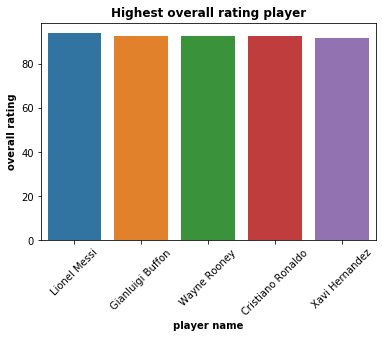

In [42]:
sns.barplot(top_rated_players , overall_rating)
plt.xticks(rotation = 45)
plt.xlabel('player name' ,fontweight ="bold")
plt.ylabel('overall rating' , fontweight ="bold")
plt.title('Highest overall rating player', fontweight ="bold")

**The ovreall best platers are:**

`Lionel Messi` , `Gianluigi Buffon` , `Wayne Rooney` , `Cristiano Ronaldo` , `Xavi Hernandez`

### Research Question 2  (What is the preffered foot ratio?)

In [43]:
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [53]:
unique_values(player_attributes_df.preferred_foot)

{'left', 'right'}

In [44]:
player_attributes_df.preferred_foot.value_counts()

right    139245
left      44733
Name: preferred_foot, dtype: int64

([<matplotlib.patches.Wedge at 0x20966b48f60>,
 [Text(-1.1915863235125086, 1.1413246836978266, 'right foot'),
  Text(1.1915863235125084, -1.1413246836978268, 'left foot')],
 [Text(-0.6499561764613682, 0.6225407365624507, '75.7%'),
  Text(0.649956176461368, -0.6225407365624508, '24.3%')])

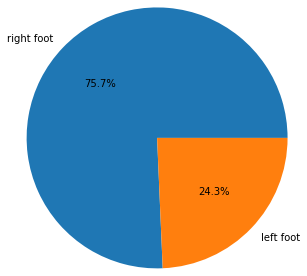

In [45]:
plt.pie(player_attributes_df.preferred_foot.value_counts(),labels = ['right foot' ,'left foot'] , autopct='%1.1f%%'
       ,radius = 1.5 )

**Three from Four players prefer right foot than left foot for playing**

### Research Question 3  (Which league had the most  scored goals?)

In [46]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [56]:
# Calculate new column 'total_goals' 
match_df['total_goals'] = match_df['home_team_goal'] + match_df['away_team_goal']

In [48]:
# Calculate the total scored goals for each league
match_df.groupby(['league_id']).total_goals.sum()

league_id
1        4841
1729     8240
4769     7427
7809     7103
10257    7895
13274    7542
15722    4656
17642    5201
19694    4804
21518    8412
24558    4166
Name: total_goals, dtype: int64

Text(0.5, 1.0, 'Total scored goals in leagues')

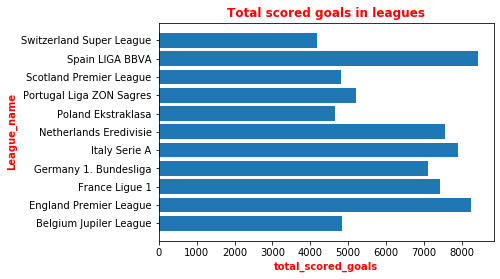

In [83]:
plt.barh(country_league_df.league_name, match_df.groupby(['league_id']).total_goals.sum())
plt.xlabel('total_scored_goals' ,color ='r'  , fontweight ="bold")
plt.ylabel('League_name',color ='r' , fontweight ="bold")
plt.title('Total scored goals in leagues',color ='r' , fontweight ="bold" )

- The Leagues that had the most scored goals are:
 - Spain LIGA BBVA
 - England Premier League
 - Italy Seria A

- The Leagues that had the leaset scored goals are:
 - Switzerland Super League
 - Poland Ekstraklasa
 - Belgium Jupiler League

### Research Question 4  (How many goals scored per season by all leagues?)

In [50]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,4


In [54]:
unique_values(match_df.season)

{'2008/2009',
 '2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016'}

In [52]:
# Calculate toral goals for all leagues per season
match_df.groupby(['season']).total_goals.sum()

season
2008/2009    8672
2009/2010    8632
2010/2011    8749
2011/2012    8747
2012/2013    9039
2013/2014    8389
2014/2015    8897
2015/2016    9162
Name: total_goals, dtype: int64

Text(0.5, 1.0, 'total Goals scored per season')

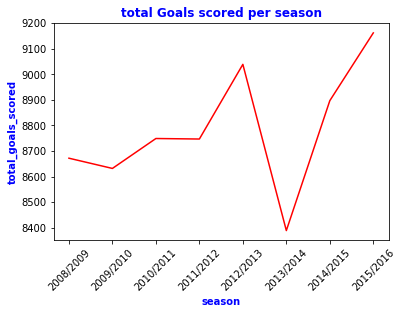

In [58]:
plt.plot(match_df.season.unique() ,match_df.groupby(['season']).total_goals.sum(),color = 'r')
plt.xticks(rotation = 45)
plt.xlabel('season',color = 'b', fontweight ="bold")
plt.ylabel('total_goals_scored',color = 'b' , fontweight ="bold")
plt.title('total Goals scored per season',color = 'b' , fontweight ="bold")

The previous graph states the total number of goals scored by all leagues during the 8 seasons from 2008/2009 to 2015/2016
- season `2015/2016` had the most scored goals
- season `2013/2014` had the leaset number of goals
- The number of scored goals increases in general with seasons except `2013/2014` season

### Research Question 5  (Who are the oldest, youngest, tallest, shortest players?)

In [54]:
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,height,weight,date_of_birth
0,1,505942,Aaron Appindangoye,218353,182.88,187,1992-02-29
1,2,155782,Aaron Cresswell,189615,170.18,146,1989-12-15
2,3,162549,Aaron Doran,186170,170.18,163,1991-05-13
3,4,30572,Aaron Galindo,140161,182.88,198,1982-05-08
4,5,23780,Aaron Hughes,17725,182.88,154,1979-11-08


In [55]:
# the youngest platyer date_of_birth
player_df.date_of_birth.max()

datetime.date(1999, 4, 24)

In [56]:
# the youngest platyer
player_df.player_name[player_df.date_of_birth == player_df.date_of_birth.max()]

5176    Jonathan Leko
Name: player_name, dtype: object

In [57]:
# the oldest platyer date_of_birth
player_df.date_of_birth.min()

datetime.date(1967, 1, 23)

In [58]:
# the oldest platyer
player_df.player_name[player_df.date_of_birth == player_df.date_of_birth.min()]

289    Alberto Fontana
Name: player_name, dtype: object

In [59]:
tallest_player_height = player_df.height.max()
tallest_player = player_df.player_name[player_df.height.idxmax()]
print(tallest_player)
print(tallest_player_height)

Kristof van Hout
208.28


In [60]:
shortest_player_height = player_df.height.min()
shortest_player = player_df.player_name[player_df.height.idxmin()]
print(shortest_player)
print(shortest_player_height)

Juan Quero
157.48


**`Alberto Fontana` is the oldest player -->  born on (1967, 1, 23)**

**`Alberto Jonathan`is the youngest player --> born on (1999, 4, 24)**

**`Kristof van Hout` is the tallest player --> 208.28 cm**

**`Juan Quero` is the shortest player -->157.48 cm**

Text(0.5, 1.0, 'players_weight Distribution \n\n')

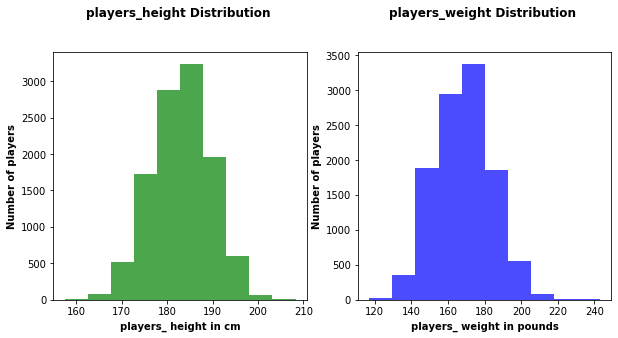

In [61]:
# height and weight Distributions of all players
fig = plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(player_df.height , bins = 10 , color = 'g' ,alpha = 0.7)
plt.xlabel('players_ height in cm', fontweight ="bold")
plt.ylabel('Number of players', fontweight ="bold")
plt.title('players_height Distribution \n\n', fontweight ="bold") 
plt.subplot(2,2,2)
plt.hist(player_df.weight , bins = 10 , color = 'b' ,alpha = 0.7)
plt.xlabel('players_ weight in pounds', fontweight ="bold")
plt.ylabel('Number of players', fontweight ="bold")
plt.title('players_weight Distribution \n\n', fontweight ="bold") 

- **The above figures show the distribution of players weight and height**
- **It is obvious that , the two graphs take the shape normal distrbution** 

### Research Question 6  (What is the biggest match result?)

In [62]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,total_goals
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,5
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,4


In [63]:
# ID of home_team of the match that had the biggest result
match_df.home_team_api_id[match_df.total_goals == 12]

20106    9927
24247    8633
Name: home_team_api_id, dtype: int64

In [64]:
# ID of away_team of the match that had the biggest result
match_df.away_team_api_id[match_df.total_goals == 12]

20106    10251
24247     8370
Name: away_team_api_id, dtype: int64

In [65]:
# home teams of the match that had the biggest result
print(team_df.team_long_name[team_df.team_api_id == 9927])
print(team_df.team_long_name[team_df.team_api_id == 8633])

237    Motherwell
Name: team_long_name, dtype: object
256    Real Madrid CF
Name: team_long_name, dtype: object


In [66]:
# aome teams of the match that had the biggest result
print(team_df.team_long_name[team_df.team_api_id == 10251])
print(team_df.team_long_name[team_df.team_api_id == 8370])

239    Hibernian
Name: team_long_name, dtype: object
278    Rayo Vallecano
Name: team_long_name, dtype: object


In [67]:
# Goals scored by Home_team
match_df.home_team_goal[match_df.total_goals == 12]

20106     6
24247    10
Name: home_team_goal, dtype: int64

In [68]:
# Goals scored by Away_team
match_df.away_team_goal[match_df.total_goals == 12]

20106    6
24247    2
Name: away_team_goal, dtype: int64

In [69]:
# season that had the match that had the biggest result
match_df.season[match_df.total_goals == 12]

20106    2009/2010
24247    2015/2016
Name: season, dtype: object

In [70]:
# league_id that had the match that had the biggest result
match_df.league_id[match_df.total_goals == 12]

20106    19694
24247    21518
Name: league_id, dtype: int64

In [71]:
# league_name that had the match that had the biggest result
print(country_league_df.league_name[country_league_df.country_id == 19694].values[0])
print(country_league_df.league_name[country_league_df.country_id == 21518].values[0])

Scotland Premier League
Spain LIGA BBVA


There are 2 matches that had the biggest result
- `Motherwell` VS `Hibernian` at season `2009/2010`  in `Scotland Premier League` --> Result: `6 / 6`
- `Real Madrid CF` VS `Rayo Vallecano` at season `2015/2016` in `Spain LIGA BBVA` --> Result: `10 / 2 `


### Research Question 7 (who are the best defenders (marking players)?)

In [72]:
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [73]:
defenders = player_attributes_df.groupby('player_api_id').marking.max().nlargest(5)
defenders

player_api_id
34520    96.0
30661    94.0
30723    94.0
34942    94.0
30617    93.0
Name: marking, dtype: float64

In [74]:
defenders_marking = defenders.tolist()
defenders_marking

[96.0, 94.0, 94.0, 94.0, 93.0]

In [75]:
defenders_id = dict(defenders.nlargest(5)).keys()
defenders_id

dict_keys([34520, 30661, 30723, 34942, 30617])

In [76]:
Best_defenders = []
for ID in defenders_id:
    defener = player_df['player_name'][player_df['player_api_id'] == ID]
    Best_defenders.append(defener.values[0])
print(x)

10845    Xavi Hernandez
Name: player_name, dtype: object


Text(0.5, 1.0, 'Best Defenders(Marking)')

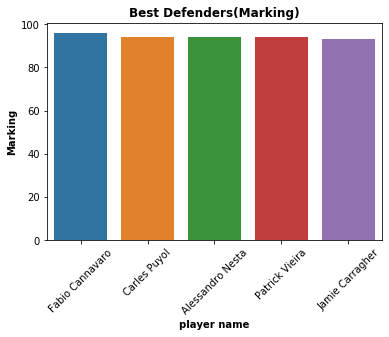

In [77]:
sns.barplot(Best_defenders , defenders_marking)
plt.xticks(rotation = 45)
plt.xlabel('player name' ,fontweight ="bold")
plt.ylabel('Marking' , fontweight ="bold")
plt.title('Best Defenders(Marking)', fontweight ="bold")

**The  best defenders (marking players) are:**
 1. `Fabio Cannavaro` 
 2. `Carles Puyol` 
 3. `Alessandro Nesta` 
 4. `Patrick Vieira`
 5. `Jamie Carragher`

### Research Question 8 (What is the relation between variables?)

Text(0.5, 1.0, 'Relation between Potential and Overall_rating')

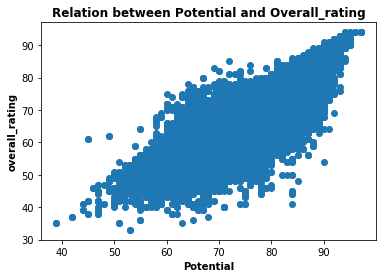

In [87]:
plt.scatter(player_attributes_df.potential , player_attributes_df.overall_rating)
plt.xlabel('Potential' ,fontweight ="bold")
plt.ylabel('overall_rating' , fontweight ="bold")
plt.title('Relation between Potential and Overall_rating', fontweight ="bold")

**It is clear that the relation between potential and overall_rating are positive , as the overall_rating of a player increases by increasing in his potential**

Text(0.5, 1.0, 'Relation between shot_power and finishing')

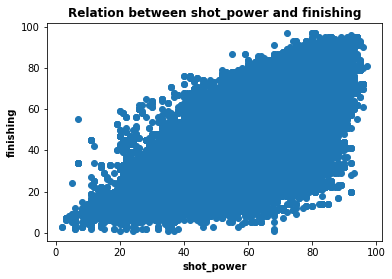

In [89]:
plt.scatter(player_attributes_df.shot_power , player_attributes_df.finishing)
plt.xlabel('shot_power' ,fontweight ="bold")
plt.ylabel('finishing' , fontweight ="bold")
plt.title('Relation between shot_power and finishing', fontweight ="bold")

**There is a positive relation between shot power and finshing on goal**

<a id='conclusions'></a>
## Conclusions

 ### Results
   1. The ovreall best platers are:

   `Lionel Messi` , `Gianluigi Buffon` , `Wayne Rooney` , `Cristiano Ronaldo` , `Xavi Hernandez`


   2. `75.7%` of players preferred right foot whilw `24.3%` preferred left one.
   

   3. `Spain LIGA BBVA` is the most scored goals with `8412` goals scored per all seasons
   

   4. Season `2015/2016` is the most scored one with 9162 goals
   

   5. - `Alberto Fontana` is the oldest player -->  born on (1967, 1, 23)

      - `Alberto Jonathan` is the youngest player --> born on (1999, 4, 24)

      - `Kristof van Hout` is the tallest player --> 208.28 cm

      - `Juan Quero` is the shortest player -->157.48 cm
      

6. There are 2 matches that had the biggest result
    - `Motherwell` VS `Hibernian` at season `2009/2010`  in `Scotland Premier League` --> Result: `6 / 6`
    - `Real Madrid CF` VS `Rayo Vallecano` at season `2015/2016` in `Spain LIGA BBVA` --> Result: `10 / 2 `


7. The  best defenders (marking players) are:

`Fabio Cannavaro` , `Carles Puyol` , `Alessandro Nesta` , `Patrick Vieira` , `Jamie Carragher`


8. - It is clear that the relation between potential and overall_rating are positive , as the overall_rating of a player      increases by increasing in his potential

  - There is a positive relation between shot power and finshing on goal

### Limitations

1. We do not have a lot of details of some column in `match_df` table like ( BWD , BWA , LBA , and others) 


2. Some of our variables are categorical, which leads to low level of statistical information.


3. Some columns have values with unclear meaning such that ('le','stoc', 'y') in `attacking_work_rate` column of `player_attributes_df` table